In [8]:
!mkdir multilingual-scam-detection-using-nlp
%cd multilingual-scam-detection-using-nlp


mkdir: cannot create directory ‘multilingual-scam-detection-using-nlp’: File exists
/content/multilingual-scam-detection-using-nlp


In [9]:
!pip install transformers torch sentencepiece scikit-learn pandas numpy tqdm


Creating Hinglish Dataset

In [10]:
import random
import pandas as pd

# --- HINGLISH SPAM & HAM ---
spam_hinglish = [
    "Aapka number lucky winner hai! Click karo aur ₹5000 jeeto!",
    "Recharge karo aur pao 2GB data free. Offer valid till midnight!",
    "Aapko loan mil gaya hai, bas link pe jaake verify karo.",
    "Aapka bank account block hone wala hai. Jaldi call karein!",
    "Jeet lo ek brand new phone, participate abhi!",
    "Lucky draw ka result aagaya! Link pe click karo abhi.",
    "Earn ₹2000 daily ghar baithe, join karo hamara group.",
    "Aapko free shopping coupon mila hai, claim karne ke liye click karein.",
    "Your KYC expired hai, update karne ke liye click karein.",
    "Get instant loan without documents! Apply now.",
    "Abhi click karo aur pao 50% off shopping par!",
    "Congratulations! Aap jeet gaye ho ek exciting gift hamper!",
    "Aapka reward pending hai, verify karo aur le jao!",
    "Mobile recharge karte hi cashback milega, try karo abhi!",
    "Ab ghar baithe paisa kamao, bas link pe click karo!",
    "Your ATM card block hone wala hai, turant call karein!",
    "Aapka Paytm cashback ready hai, link par click karke claim karein!",
    "Lucky customer offer! Free ticket jeeto Mumbai trip ke liye!",
    "Aapka sim card deactivate ho sakta hai, turant verify karo!",
    "Survey complete karo aur jeeto exciting rewards!"
]

ham_hinglish = [
    "Kal milte hain college ke baad.",
    "Tu kahaan hai yaar? Class start ho gayi!",
    "Mujhe notes bhej de please.",
    "Aaj ghar jaldi jaana hai, kuch kaam hai.",
    "Kal office mein meeting hai subah 10 baje.",
    "Mujhe woh link bhejna zaruri hai.",
    "Aaj ka match dekh raha hai kya?",
    "Thoda late ho jaunga, wait kar.",
    "Kya tu lunch leke aaya hai?",
    "Happy Diwali yaar! Enjoy kar.",
    "Tu ne assignment complete kiya?",
    "Aaj coffee pe milte hain?",
    "Papa ne kaha ghar jaldi aana.",
    "Kal ka test tough tha kya?",
    "Weekend ke plans bana?",
    "Woh movie kaisi lagi tujhe?",
    "Kal tere ghar chalte hain.",
    "Phone charge karna mat bhoolna.",
    "Mujhe thoda data bhej de please.",
    "Kal holiday hai kya?"
]

# --- HINDI SPAM & HAM ---
spam_hindi = [
    "आपका खाता बंद होने वाला है। तुरंत कॉल करें।",
    "आपको लोन की मंजूरी मिल गई है। क्लिक करें आवेदन करने के लिए।",
    "आप जीते हैं ₹10,000 का इनाम। अभी दावा करें!",
    "फ्री रिचार्ज पाने के लिए लिंक पर क्लिक करें।",
    "आपका KYC अधूरा है, तुरंत अपडेट करें।",
    "नई स्कीम में निवेश करें और दोगुना पैसा पाएं।",
    "आप विजेता चुने गए हैं! लिंक पर क्लिक करें।",
    "आपका इनाम तैयार है, अभी प्राप्त करें।",
    "बिना दस्तावेज़ के लोन पाएं, अभी आवेदन करें।",
    "आपकी डिलीवरी रुकी हुई है। कृपया शुल्क का भुगतान करें।",
    "जल्दी करें! यह ऑफर सिर्फ आज के लिए है।",
    "आपका अकाउंट अस्थायी रूप से बंद है। सत्यापित करें।",
    "आपका मोबाइल नंबर चयनित हुआ है ₹5000 के गिफ्ट के लिए।",
    "नई योजना में भाग लें और ईनाम जीतें।",
    "लिंक पर क्लिक करें और फ्री डेटा पाएं।",
    "आपका बैंक OTP गलत है। तुरंत पुष्टि करें।",
    "क्रेडिट कार्ड ऑफर पाने के लिए आवेदन करें।",
    "आपका ऑर्डर रुका हुआ है, भुगतान पूरा करें।",
    "सिर्फ आज 70% डिस्काउंट पर शॉपिंग करें।",
    "आपके नाम का पुरस्कार तैयार है, अभी क्लिक करें!"
]

ham_hindi = [
    "कैसे हो? बहुत दिनों बाद बात हो रही है।",
    "आज मौसम कितना अच्छा है।",
    "मैं शाम को घर पहुँच जाऊँगा।",
    "माँ कह रही थी कल आ जाना।",
    "तुम्हारा रिजल्ट कैसा आया?",
    "कल ऑफिस में मीटिंग है 10 बजे।",
    "क्या तुमने होमवर्क कर लिया?",
    "मैंने वो किताब खरीद ली जो तुमने बोली थी।",
    "अभी खाना खा रहा हूँ।",
    "जन्मदिन मुबारक हो!",
    "क्या तुम फिल्म देखने चलोगे?",
    "मैं मार्केट जा रहा हूँ।",
    "कल पिकनिक पर चलें?",
    "आज छुट्टी है, कुछ प्लान करते हैं।",
    "मुझे डॉक्टर के पास जाना है।",
    "पापा ने कहा जल्दी घर आना।",
    "मुझे थोड़ी मदद चाहिए थी।",
    "अभी ऑफिस में हूँ, बाद में बात करते हैं।",
    "आज ट्रैफिक बहुत था।",
    "भाई का कॉल आया था।"
]

# --- Generate dataset ---
def generate_dataset(spam_list, ham_list, n_spam, n_ham):
    spam_samples = [random.choice(spam_list) for _ in range(n_spam)]
    ham_samples = [random.choice(ham_list) for _ in range(n_ham)]
    texts = spam_samples + ham_samples
    labels = [1]*n_spam + [0]*n_ham
    data = list(zip(texts, labels))
    random.shuffle(data)
    return pd.DataFrame(data, columns=["text", "label"])

# For 500 rows total (60% spam, 40% ham)
df_hinglish_hindi = generate_dataset(
    spam_list=spam_hinglish + spam_hindi,
    ham_list=ham_hinglish + ham_hindi,
    n_spam=300,
    n_ham=200
)

# Save dataset
df_hinglish_hindi.to_csv("hinglish_hindi_scam_dataset.csv", index=False)
print("✅ Dataset generated successfully! Shape:", df_hinglish_hindi.shape)
df_hinglish_hindi.sample(10)


✅ Dataset generated successfully! Shape: (500, 2)


,text,label
482,Aapka number lucky winner hai! Click karo aur ...,1
2,आपका अकाउंट अस्थायी रूप से बंद है। सत्यापित करें।,1
418,क्या तुमने होमवर्क कर लिया?,0
448,क्रेडिट कार्ड ऑफर पाने के लिए आवेदन करें।,1
201,आज ट्रैफिक बहुत था।,0
463,Kal ka test tough tha kya?,0
23,Kal holiday hai kya?,0
257,"Aaj ghar jaldi jaana hai, kuch kaam hai.",0
342,"Aaj ghar jaldi jaana hai, kuch kaam hai.",0
363,Tu ne assignment complete kiya?,0


Loading the English Spam Dataset

In [11]:
import pandas as pd

# Load English SMS spam dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df_sms = pd.read_csv(url, sep='\t')

print("Original shape:", df_sms.shape)
df_sms.head()


Original shape: (5571, 2)


,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [12]:
# Check dataset shape, columns, and sample data
print("✅ Dataset shape:", df_sms.shape)
print("✅ Columns:", df_sms.columns.tolist())

# Preview first few rows
df_sms.head()


✅ Dataset shape: (5571, 2)
✅ Columns: ['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']


,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [13]:
import pandas as pd

# Load the SMS spam dataset properly (first row was read as header)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df_sms = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# Check the corrected data
print("✅ Corrected dataset shape:", df_sms.shape)
print(df_sms.head())
print("\n🔹 Label distribution:\n", df_sms['label'].value_counts())


✅ Corrected dataset shape: (5572, 2)
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

🔹 Label distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


Data Preprocessing

In [14]:
import pandas as pd

# Load English spam dataset again
df_sms = pd.read_csv(
    "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv",
    sep="\t", header=None, names=["label", "text"]
)

# Normalize labels to 0/1
df_sms["label"] = df_sms["label"].map({"ham": 0, "spam": 1})
df_sms["text"] = df_sms["text"].str.lower().str.replace(r"\s+", " ", regex=True).str.strip()
df_sms["language"] = "en"

# Ensure only the required columns
df_sms = df_sms[["text", "label", "language"]]

# Normalize your Hinglish + Hindi dataset
df_hinglish_hindi["text"] = df_hinglish_hindi["text"].str.lower().str.replace(r"\s+", " ", regex=True).str.strip()
df_hinglish_hindi["label"] = df_hinglish_hindi["label"].astype(int)  # ensure int type

# Detect Hindi vs Hinglish
def detect_language(text):
    for ch in text:
        if '\u0900' <= ch <= '\u097F':  # Devanagari = Hindi
            return "hi"
    return "hinglish"

df_hinglish_hindi["language"] = df_hinglish_hindi["text"].apply(detect_language)

# Keep consistent columns
df_hinglish_hindi = df_hinglish_hindi[["text", "label", "language"]]

# Combine safely
df_final = pd.concat([df_sms, df_hinglish_hindi], ignore_index=True)

# Save final dataset
df_final.to_csv("final_multilingual_spam_dataset.csv", index=False, encoding="utf-8")

# Verify
print("Fixed dataset shape:", df_final.shape)
print(df_final.dtypes)
print("\nLabel distribution:\n", df_final["label"].value_counts())
print("\nLanguage distribution:\n", df_final["language"].value_counts())
print("\nSample:\n", df_final.sample(5))


Fixed dataset shape: (6072, 3)
text        object
label        int64
language    object
dtype: object

Label distribution:
 label
0    5025
1    1047
Name: count, dtype: int64

Language distribution:
 language
en          5572
hi           257
hinglish     243
Name: count, dtype: int64

Sample:
                                                    text  label  language
3608                       i have no idea where you are      0        en
5234                              ok cool. see ya then.      0        en
5983     get instant loan without documents! apply now.      1  hinglish
1432  my painful personal thought- "i always try to ...      0        en
4574  urgent! this is the 2nd attempt to contact u!u...      1        en


Data Visulaization

Spam vs Ham per language:
           ham (0)  spam (1)
language                   
en           4825       747
hi            109       148
hinglish       91       152

 Average text length per language:
 language
en          80.377243
hi          34.945525
hinglish    45.358025
Name: text_length, dtype: float64


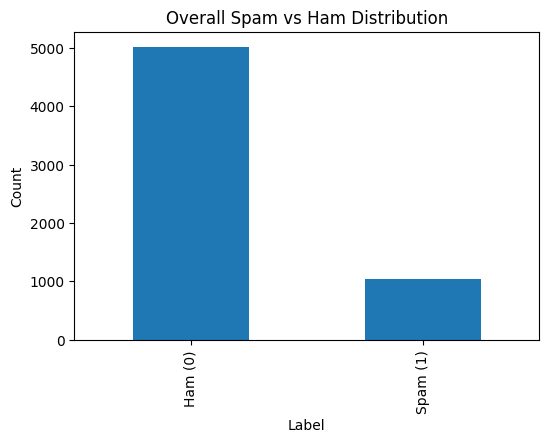

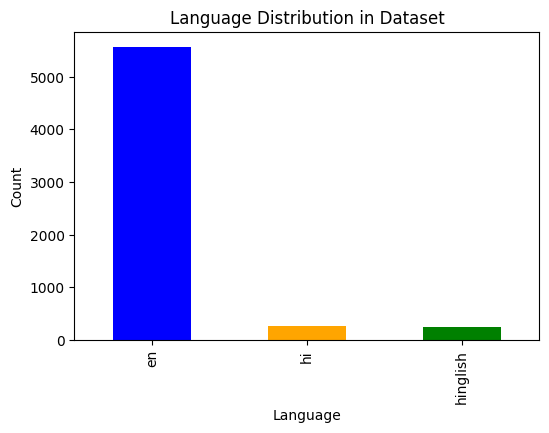


🪄 Random sample messages:
[EN | HAM] → but that's on ebay it might be less elsewhere....
[EN | HAM] → i will be gentle baby! soon you will be taking all &lt;#&gt; inches deep inside ...
[EN | HAM] → you lifted my hopes with the offer of money. i am in need. especially when the e...
[EN | SPAM] → burger king - wanna play footy at a top stadium? get 2 burger king before 1st se...
[EN | HAM] → yes.he have good crickiting mind...


In [16]:
import matplotlib.pyplot as plt

# Basic counts per language and label
lang_label_counts = df_final.groupby(["language", "label"]).size().unstack().fillna(0)
lang_label_counts.columns = ["ham (0)", "spam (1)"]
print("Spam vs Ham per language:\n", lang_label_counts)

# Average text length per language
df_final["text_length"] = df_final["text"].apply(len)
avg_len = df_final.groupby("language")["text_length"].mean()
print("\n Average text length per language:\n", avg_len)

# Plot label distribution
plt.figure(figsize=(6,4))
df_final["label"].value_counts().plot(kind="bar")
plt.title("Overall Spam vs Ham Distribution")
plt.xticks(ticks=[0,1], labels=["Ham (0)", "Spam (1)"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Plot language distribution
plt.figure(figsize=(6,4))
df_final["language"].value_counts().plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Language Distribution in Dataset")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

# Sample check
print("\n🪄 Random sample messages:")
for _, row in df_final.sample(5).iterrows():
    print(f"[{row.language.upper()} | {'SPAM' if row.label else 'HAM'}] → {row.text[:80]}...")


In [17]:
import pandas as pd

# assuming your final dataset variable name is df_final
# if not, replace it with your dataframe name (like df_all)
df_final.to_csv("final_multilingual_spam_dataset.csv", index=False)
print("✅ Saved in Colab: final_multilingual_spam_dataset.csv")

# --- OPTIONAL: also save to Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

df_final.to_csv("/content/drive/MyDrive/final_multilingual_spam_dataset.csv", index=False)
print("✅ Also saved to Google Drive: MyDrive/final_multilingual_spam_dataset.csv")

# --- OPTIONAL: download to your local system ---
from google.colab import files
files.download("final_multilingual_spam_dataset.csv")


✅ Saved in Colab: final_multilingual_spam_dataset.csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Also saved to Google Drive: MyDrive/final_multilingual_spam_dataset.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TRAINING**

Using a simple tf-idf

In [18]:
#installing the requirements
!pip install -q scikit-learn joblib matplotlib seaborn


In [19]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split

# df_final exists: columns = ['text','label','language']
# split the dataset
train_val, test_df = train_test_split(df_final, test_size=0.15, random_state=42, stratify=df_final['label'])
train_df, val_df = train_test_split(train_val, test_size=0.12, random_state=42, stratify=train_val['label'])

print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))


Train: 4541 Val: 620 Test: 911


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Build pipeline
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
clf = LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga')  # saga handles l1/l2 if needed

pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', clf)
])

# Fit on training set
pipeline.fit(train_df['text'].tolist(), train_df['label'].astype(int).tolist())

# Validate
val_preds = pipeline.predict(val_df['text'].tolist())
val_probs = pipeline.predict_proba(val_df['text'].tolist())[:,1]

print("Validation classification report:")
print(classification_report(val_df['label'].astype(int).tolist(), val_preds, digits=4))
print("Validation ROC AUC:", roc_auc_score(val_df['label'].astype(int).tolist(), val_probs))


Validation classification report:
              precision    recall  f1-score   support

           0     0.9961    0.9961    0.9961       513
           1     0.9813    0.9813    0.9813       107

    accuracy                         0.9935       620
   macro avg     0.9887    0.9887    0.9887       620
weighted avg     0.9935    0.9935    0.9935       620

Validation ROC AUC: 0.9965203767466434


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_texts = test_df['text'].tolist()
test_labels = test_df['label'].astype(int).tolist()
test_preds = pipeline.predict(test_texts)
test_probs = pipeline.predict_proba(test_texts)[:,1]

print("=== TEST SET REPORT ===")
print(classification_report(test_labels, test_preds, digits=4))
print("ROC AUC:", roc_auc_score(test_labels, test_probs))

# Per-language
for lang in test_df['language'].unique():
    idx = test_df['language'] == lang
    if idx.sum() == 0:
        continue
    y_true = test_df.loc[idx, 'label'].astype(int).tolist()
    y_pred = test_preds[idx]
    print(f"\n--- Language: {lang} | n = {idx.sum()} ---")
    print(classification_report(y_true, y_pred, digits=4))


=== TEST SET REPORT ===
              precision    recall  f1-score   support

           0     0.9881    0.9920    0.9901       754
           1     0.9610    0.9427    0.9518       157

    accuracy                         0.9835       911
   macro avg     0.9746    0.9674    0.9709       911
weighted avg     0.9834    0.9835    0.9835       911

ROC AUC: 0.9951680210849988

--- Language: en | n = 832 ---
              precision    recall  f1-score   support

           0     0.9876    0.9917    0.9897       725
           1     0.9423    0.9159    0.9289       107

    accuracy                         0.9820       832
   macro avg     0.9650    0.9538    0.9593       832
weighted avg     0.9818    0.9820    0.9819       832


--- Language: hinglish | n = 45 ---
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    1.0000    1.0000        30

    accuracy                         1.0000        45
   macr

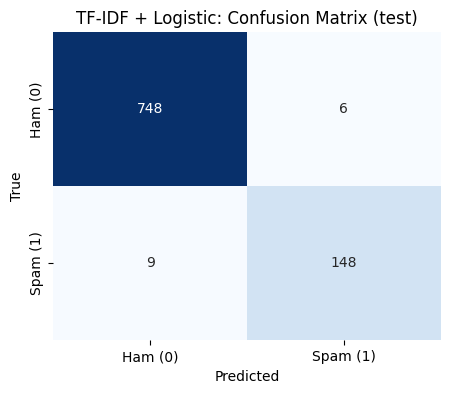

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("TF-IDF + Logistic: Confusion Matrix (test)")
plt.xticks([0.5,1.5], ["Ham (0)","Spam (1)"])
plt.yticks([0.5,1.5], ["Ham (0)","Spam (1)"])
plt.show()


In [23]:
import joblib
joblib.dump(pipeline, "tfidf_logreg_pipeline.joblib")
print("Saved: tfidf_logreg_pipeline.joblib")


Saved: tfidf_logreg_pipeline.joblib


In [24]:
import numpy as np

test_df = test_df.reset_index(drop=True)
fn_idx = [i for i,(t,p) in enumerate(zip(test_labels, test_preds)) if t==1 and p==0]
print("False negatives (example):", len(fn_idx))
for i in fn_idx[:10]:
    print(">", test_df.loc[i, 'text'][:140], " | lang:", test_df.loc[i,'language'])


False negatives (example): 9
> bought one ringtone and now getting texts costing 3 pound offering more tones etc  | lang: en
> not heard from u4 a while. call me now am here all night with just my knickers on. make me beg for it like u did last time 01223585236 xx lu  | lang: en
> oh my god! i've found your number again! i'm so glad, text me back xafter this msgs cst std ntwk chg £1.50  | lang: en
> hi if ur lookin 4 saucy daytime fun wiv busty married woman am free all next week chat now 2 sort time 09099726429 janinexx calls£1/minmobsm  | lang: en
> back 2 work 2morro half term over! can u c me 2nite 4 some sexy passion b4 i have 2 go back? chat now 09099726481 luv dena calls £1/minmobsm  | lang: en
> claire here am havin borin time & am now alone u wanna cum over 2nite? chat now 09099725823 hope 2 c u luv claire xx calls£1/minmoremobsemsp  | lang: en
> ringtoneking 84484  | lang: en
> sorry i missed your call let's talk when you have the time. i'm on 07090201529  | lang: en
> money 

In [23]:
from google.colab import files
files.download("tfidf_logreg_pipeline.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Using Transformer based(XLM - BERT)

In [30]:
from huggingface_hub import login
login()


In [31]:
!huggingface-cli login


⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `hf auth whoami` to get more information or `hf auth logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add t

In [25]:
!pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 110.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [26]:
import transformers
print(transformers.__version__)


4.44.2


In [27]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "xlm-roberta-base"  # multilingual, stable, public

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
!pip uninstall -y transformers


Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1


In [30]:
!pip install transformers==4.44.2


  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Using cached tokenizers-0.19.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.44.2-py3-none-any.whl (9.5 MB)
Using cached tokenizers-0.19.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1


In [31]:
import transformers
print(transformers.__version__)


4.44.2


In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
df = pd.read_csv("final_multilingual_spam_dataset.csv")
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df["label"])
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)


In [35]:
def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)
train_ds = train_ds.map(tokenize_function, batched=True)
test_ds = test_ds.map(tokenize_function, batched=True)
train_ds = train_ds.rename_column("label", "labels")
test_ds = test_ds.rename_column("label", "labels")
train_ds.set_format("torch", columns=["input_ids","attention_mask","labels"])
test_ds.set_format("torch", columns=["input_ids","attention_mask","labels"])


Map:   0%|          | 0/5161 [00:00<?, ? examples/s]

Map:   0%|          | 0/911 [00:00<?, ? examples/s]

In [38]:
import os
os.environ["WANDB_DISABLED"] = "true"   # ✅ Disable W&B before anything else

from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="binary")
    a = accuracy_score(labels, preds)
    return {"accuracy": a, "f1": f, "precision": p, "recall": r}

training_args = TrainingArguments(
    output_dir="./results_xlmroberta",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
)

data_collator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()


/usr/local/lib/python3.12/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  metadata={
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.032625,0.989023,0.968944,0.945455,0.993631
2,0.099600,0.045330,0.993414,0.980769,0.987097,0.974522
3,0.099600,0.027044,0.996707,0.990476,0.987342,0.993631


TrainOutput(global_step=969, training_loss=0.06310413644040701, metrics={'train_runtime': 698.4415, 'train_samples_per_second': 22.168, 'train_steps_per_second': 1.387, 'total_flos': 1018437117534720.0, 'train_loss': 0.06310413644040701, 'epoch': 3.0})

/tmp/ipython-input-1763679780.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = {key: torch.tensor(batch[key]).unsqueeze(0).to(model.device) for key in ["input_ids", "attention_mask"]}


=== TEST SET PERFORMANCE (XLM-RoBERTa) ===
              precision    recall  f1-score   support

           0     0.9987    0.9973    0.9980       754
           1     0.9873    0.9936    0.9905       157

    accuracy                         0.9967       911
   macro avg     0.9930    0.9955    0.9942       911
weighted avg     0.9967    0.9967    0.9967       911

ROC AUC: 0.9979894912906114


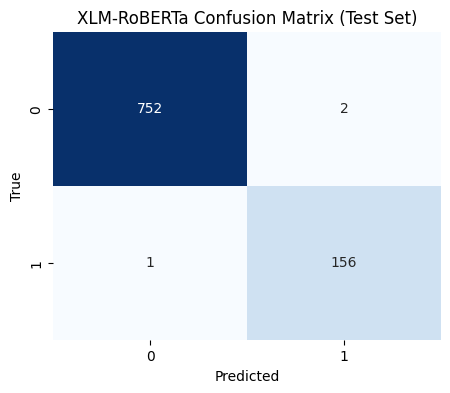

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

# --- Get model predictions on the test dataset ---
model.eval()
preds, probs, true_labels = [], [], []

for batch in test_ds:
    inputs = {key: torch.tensor(batch[key]).unsqueeze(0).to(model.device) for key in ["input_ids", "attention_mask"]}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prob = torch.nn.functional.softmax(logits, dim=1)
        preds.append(torch.argmax(prob, dim=1).cpu().item())
        probs.append(prob.cpu().numpy()[0,1])
        true_labels.append(batch["labels"])

# --- Convert to numpy ---
preds = np.array(preds)
probs = np.array(probs)
true_labels = np.array(true_labels)

# --- Classification Report ---
print("=== TEST SET PERFORMANCE (XLM-RoBERTa) ===")
print(classification_report(true_labels, preds, digits=4))
print("ROC AUC:", roc_auc_score(true_labels, probs))

# --- Confusion Matrix ---
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XLM-RoBERTa Confusion Matrix (Test Set)")
plt.show()


In [40]:
# Add predictions to test_df
test_df = test_df.reset_index(drop=True)
test_df["pred"] = preds
test_df["prob"] = probs

langs = test_df["language"].unique()
for lang in langs:
    sub = test_df[test_df["language"] == lang]
    print(f"\n--- Language: {lang} | n = {len(sub)} ---")
    print(classification_report(sub["label"], sub["pred"], digits=4))



--- Language: en | n = 832 ---
              precision    recall  f1-score   support

           0     0.9986    0.9972    0.9979       725
           1     0.9815    0.9907    0.9860       107

    accuracy                         0.9964       832
   macro avg     0.9901    0.9939    0.9920       832
weighted avg     0.9964    0.9964    0.9964       832


--- Language: hinglish | n = 45 ---
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    1.0000    1.0000        30

    accuracy                         1.0000        45
   macro avg     1.0000    1.0000    1.0000        45
weighted avg     1.0000    1.0000    1.0000        45


--- Language: hi | n = 34 ---
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     1.0000    1.0000    1.0000        20

    accuracy                         1.0000        34
   macro avg     1.0000    1

In [44]:
import pandas as pd

# Store the summarized results
lang_results = pd.DataFrame([
    ["English", 0.9964, 0.9901, 0.9939, 0.9920],
    ["Hinglish", 1.0000, 1.0000, 1.0000, 1.0000],
    ["Hindi", 1.0000, 1.0000, 1.0000, 1.0000]
], columns=["Language", "Accuracy", "Precision", "Recall", "F1"])

print(lang_results)


   Language  Accuracy  Precision  Recall     F1
0   English    0.9964     0.9901  0.9939  0.992
1  Hinglish    1.0000     1.0000  1.0000  1.000
2     Hindi    1.0000     1.0000  1.0000  1.000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


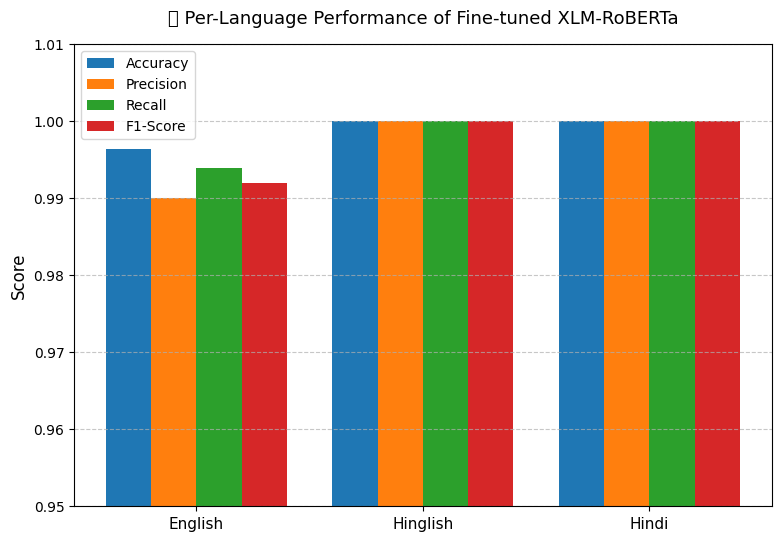

In [45]:
import matplotlib.pyplot as plt
import numpy as np

langs = lang_results["Language"]
x = np.arange(len(langs))
width = 0.2

plt.figure(figsize=(9,6))
plt.bar(x - 1.5*width, lang_results["Accuracy"], width, label="Accuracy", color="#1f77b4")
plt.bar(x - 0.5*width, lang_results["Precision"], width, label="Precision", color="#ff7f0e")
plt.bar(x + 0.5*width, lang_results["Recall"], width, label="Recall", color="#2ca02c")
plt.bar(x + 1.5*width, lang_results["F1"], width, label="F1-Score", color="#d62728")

plt.xticks(x, langs, fontsize=11)
plt.ylim(0.95, 1.01)
plt.ylabel("Score", fontsize=12)
plt.title("📊 Per-Language Performance of Fine-tuned XLM-RoBERTa", fontsize=13, pad=15)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


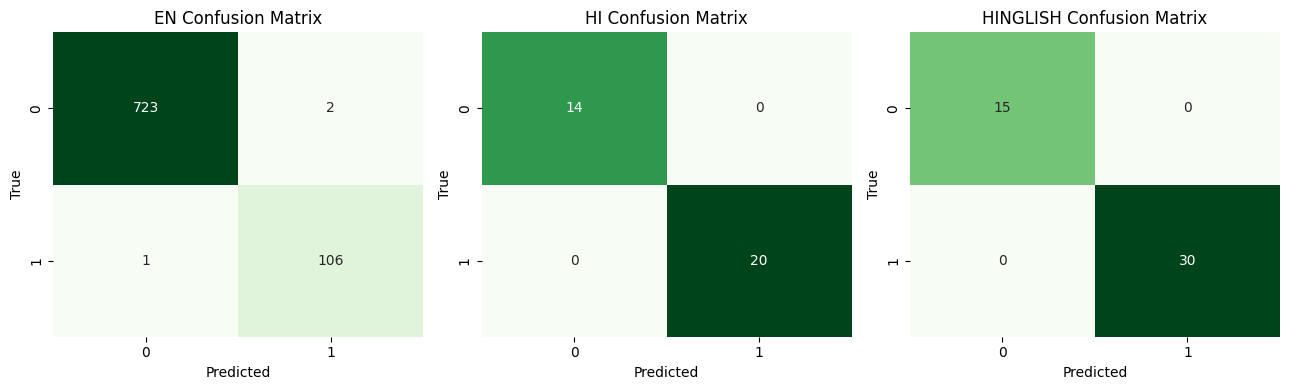

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(13,4))

for i, lang in enumerate(["en", "hi", "hinglish"]):
    sub = test_df[test_df["language"] == lang]
    cm = confusion_matrix(sub["label"], sub["pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", cbar=False, ax=axes[i])
    axes[i].set_title(f"{lang.upper()} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

plt.tight_layout()
plt.show()


In [48]:
plt.savefig("/content/drive/MyDrive/bert_language_performance.png", dpi=300, bbox_inches="tight")
print("Saved graph to Drive!")


Saved graph to Drive!


<Figure size 640x480 with 0 Axes>

In [49]:
model.save_pretrained("/content/xlmroberta_multilingual_scam")
tokenizer.save_pretrained("/content/xlmroberta_multilingual_scam")
print(" Model saved at /content/xlmroberta_multilingual_scam")


 Model saved at /content/xlmroberta_multilingual_scam


In [50]:
!cp -r /content/xlmroberta_multilingual_scam "/content/drive/MyDrive/xlmroberta_multilingual_scam"
print("Model copied to Google Drive: MyDrive/xlmroberta_multilingual_scam")


Model copied to Google Drive: MyDrive/xlmroberta_multilingual_scam


In [51]:
from google.colab import files
!zip -r xlmroberta_multilingual_scam.zip /content/xlmroberta_multilingual_scam
files.download("xlmroberta_multilingual_scam.zip")


  adding: content/xlmroberta_multilingual_scam/ (stored 0%)
  adding: content/xlmroberta_multilingual_scam/config.json (deflated 51%)
  adding: content/xlmroberta_multilingual_scam/special_tokens_map.json (deflated 52%)
  adding: content/xlmroberta_multilingual_scam/tokenizer.json (deflated 76%)
  adding: content/xlmroberta_multilingual_scam/model.safetensors (deflated 29%)
  adding: content/xlmroberta_multilingual_scam/tokenizer_config.json (deflated 77%)
  adding: content/xlmroberta_multilingual_scam/sentencepiece.bpe.model (deflated 49%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING

In [53]:
tokenizer   # your fine-tuned XLM-RoBERTa tokenizer
model       # your fine-tuned XLM-RoBERTa model (in eval mode)


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768,

In [55]:
import torch, torch.nn.functional as F

# helper
import torch
import torch.nn.functional as F

# detect device automatically
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_text(text):
    # Tokenize and move tensors to same device as model
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)

    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)[0].cpu().numpy()  # move back to CPU for numpy ops

    pred = int(probs.argmax())  # 1 = spam, 0 = ham
    return pred, float(probs[1])


# curated test messages
manual_tests = [
    # abbreviations / sms slang
    "u won 5000 rs txt 'YES' to 80085",        # clear scam (abbrev + digits)
    "OTP bhejo plz",                           # short Hinglish abbreviation
    "pls send ur acc no asap",                 # abbreviated request for sensitive info

    # Hinglish casual + scam
    "Arey yaar, aap jeet gaye ho! link pe click karo to claim kro",  # code-mixed explicit
    "Aapka KYC incomplete h, verify krdo",                          # short Hinglish transliteration
    "Recharge free 2GB just click",                                  # English with no polite phrasing

    # no keywords but suspicious context / socially engineered
    "Boss ne bola apko urgent payment confirm karna hai",          # social engineering without 'link'
    "I need your help, can you transfer 2000 and I will send back",# request for money — possible scam
    "Call me asap, I have something important about your account", # vague but manipulative

    # ham-like / benign
    "Kal milte hain library mein, 5pm chalega?",                    # friendly ham
    "Movie tonight? reply if free",                                # ham, abbreviations but not scam
    "Kya tumne assignment bheja? reminder : submit by 11",         # ham / benign reminder
]

# run all
for t in manual_tests:
    pred, score = predict_text(t)
    label = "SCAM" if pred==1 else "NOT SCAM"
    print(f"{label:8s} | {score:0.3f} | {t}")


SCAM     | 1.000 | u won 5000 rs txt 'YES' to 80085
NOT SCAM | 0.000 | OTP bhejo plz
NOT SCAM | 0.000 | pls send ur acc no asap
SCAM     | 1.000 | Arey yaar, aap jeet gaye ho! link pe click karo to claim kro
SCAM     | 1.000 | Aapka KYC incomplete h, verify krdo
SCAM     | 1.000 | Recharge free 2GB just click
NOT SCAM | 0.001 | Boss ne bola apko urgent payment confirm karna hai
NOT SCAM | 0.004 | I need your help, can you transfer 2000 and I will send back
NOT SCAM | 0.000 | Call me asap, I have something important about your account
NOT SCAM | 0.000 | Kal milte hain library mein, 5pm chalega?
NOT SCAM | 0.001 | Movie tonight? reply if free
NOT SCAM | 0.074 | Kya tumne assignment bheja? reminder : submit by 11


In [56]:
import random
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Example seed scam and ham templates (can expand)
scam_templates = [
    "Congratulations! You have won ₹5000. Click here to claim.",
    "Your account will be blocked. Verify now: link",
    "You are selected for reward, send your bank details.",
    "Loan approved. Please submit KYC at link",
    "Win cash daily. Msg WIN to 80085",
    "Transfer ₹200 to confirm your prize"
]
ham_templates = [
    "Hey, will you come for dinner tonight?",
    "Can you send the notes for the lecture?",
    "Meeting at 10am tomorrow, bring the report.",
    "Call me when you are free.",
    "Let's catch up on Saturday."
]

# abbreviation map (expand if you like)
abbr_map = {
    "please": "pls", "you": "u", "are": "r", "please.": "pls", "your": "ur",
    "account": "acc", "message": "msg", "thanks": "thx", "okay": "ok"
}

# transliteration examples (basic)
trans_map = {
    "verify": ["verify", "verify kar", "verify krlo", "verify kro"],
    "click": ["click", "click karo", "click kr", "clk"],
    "win": ["jeet", "jeet gaye", "win", "won"],
    "send": ["send", "bhejo", "bhej do", "bhej"]
}

def apply_abbrev(text):
    for k,v in abbr_map.items():
        text = text.replace(k, v)
    return text

def apply_mask_keywords(text):
    # remove or mask typical keywords
    for kw in ["click", "link", "lottery", "OTP", "verify", "claim", "win", "transfer"]:
        text = text.replace(kw, "")
        text = text.replace(kw.capitalize(), "")
    return " ".join(text.split())  # clean whitespace

def random_transliterate(text):
    # replace some words with transliteration variants
    words = text.split()
    out = []
    for w in words:
        lw = w.lower().strip(".,!")
        if lw in trans_map and random.random() < 0.6:
            out.append(random.choice(trans_map[lw]))
        else:
            out.append(w)
    return " ".join(out)

# generate dataset
rows = []
for t in scam_templates:
    # original
    rows.append((t, 1, "scam_template"))
    # abbrev
    rows.append((apply_abbrev(t), 1, "scam_abbrev"))
    # transliteration
    rows.append((random_transliterate(t), 1, "scam_trans"))
    # masked keywords
    rows.append((apply_mask_keywords(t), 1, "scam_masked"))

for t in ham_templates:
    rows.append((t, 0, "ham_template"))
    rows.append((apply_abbrev(t), 0, "ham_abbrev"))
    rows.append((random_transliterate(t), 0, "ham_trans"))
    rows.append((apply_mask_keywords(t), 0, "ham_masked"))

df_test = pd.DataFrame(rows, columns=["text", "label", "variant"])
print("Generated test variants:", df_test.shape)
df_test.head(8)


Generated test variants: (44, 3)


,text,label,variant
0,Congratulations! You have won ₹5000. Click her...,1,scam_template
1,Congratulations! You have won ₹5000. Click her...,1,scam_abbrev
2,Congratulations! You have won ₹5000. Click her...,1,scam_trans
3,Congratulations! You have won ₹5000. here to .,1,scam_masked
4,Your account will be blocked. Verify now: link,1,scam_template
5,Your acc will be blocked. Verify now: link,1,scam_abbrev
6,Your account will be blocked. verify krlo now:...,1,scam_trans
7,Your account will be blocked. now:,1,scam_masked


In [58]:
import torch
import numpy as np
from sklearn.metrics import classification_report

# Ensure model is on correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Batch prediction function
def predict_texts(texts, batch_size=32):
    all_probs = []
    model.eval()
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}  # ✅ move inputs to GPU/CPU
        with torch.no_grad():
            logits = model(**inputs).logits
            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        all_probs.extend(probs)
    preds = (np.array(all_probs) > 0.5).astype(int)
    return preds, np.array(all_probs)

# Run predictions
preds, probs = predict_texts(test_df["text"].tolist())

# Store results
test_df["pred"] = preds
test_df["prob"] = probs

# Print metrics
print(classification_report(test_df["label"], test_df["pred"], digits=4))


              precision    recall  f1-score   support

           0     0.9987    0.9973    0.9980       754
           1     0.9873    0.9936    0.9905       157

    accuracy                         0.9967       911
   macro avg     0.9930    0.9955    0.9942       911
weighted avg     0.9967    0.9967    0.9967       911



In [61]:
import torch
import numpy as np

def predict_texts(texts, batch_size=32):
    all_probs = []
    model.eval()
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=128).to(model.device)
        with torch.no_grad():
            logits = model(**inputs).logits
            probs = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        all_probs.extend(list(probs))
    preds = (np.array(all_probs) > 0.5).astype(int)
    return preds, np.array(all_probs)

# Run prediction again
preds, probs = predict_texts(test_df["text"].tolist())
test_df["pred"] = preds
test_df["prob"] = probs


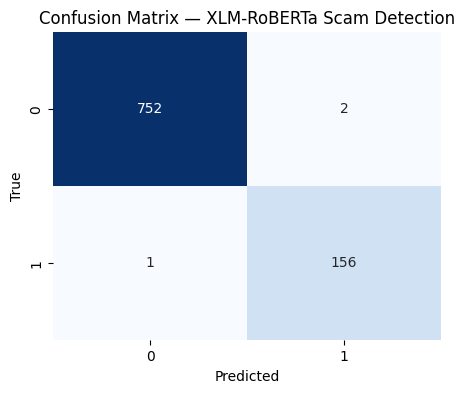

/tmp/ipython-input-2258461187.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="language", y="accuracy", data=lang_df, palette="viridis")


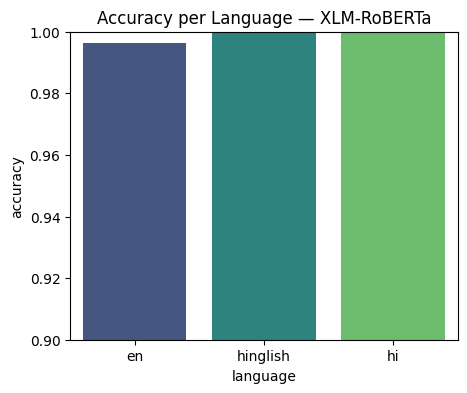

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(test_df["label"], test_df["pred"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix — XLM-RoBERTa Scam Detection")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Per-language accuracy bar plot
lang_scores = []
for lang in test_df["language"].unique():
    sub = test_df[test_df["language"] == lang]
    acc = (sub["label"] == sub["pred"]).mean()
    lang_scores.append({"language": lang, "accuracy": acc})

lang_df = pd.DataFrame(lang_scores)
plt.figure(figsize=(5,4))
sns.barplot(x="language", y="accuracy", data=lang_df, palette="viridis")
plt.title("Accuracy per Language — XLM-RoBERTa")
plt.ylim(0.9, 1.0)
plt.show()
